In [1]:
import pandas as pd
import numpy as np

In [6]:
titanic = pd.read_excel('D:\\M.Sc Semester-III\\daplab\\titanic.xlsx')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# (a) Graphically explore the data
x = titanic["PassengerId"]
x

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [8]:
y = titanic["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

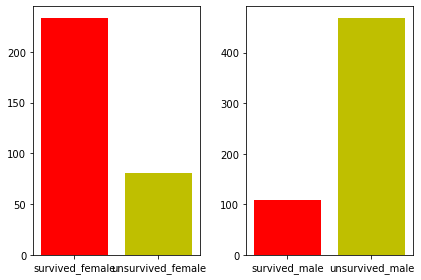

In [12]:
female = titanic[titanic['Sex']=='female']
male = titanic[titanic['Sex']=='male']
survived_female = len(female[female['Survived'] == 1])
unsurvived_female = len(female[female['Survived'] == 0])


survived_male = len(male[male['Survived'] == 1])
unsurvived_male = len(male[male['Survived'] == 0])

fig2, ax = plt.subplots(1,2)

ax11 = ax[0].bar(['survived_female', 'unsurvived_female'],[survived_female,unsurvived_female], color = ['r','y'])
ax11 = ax[1].bar(['survived_male', 'unsurvived_male'],[survived_male,unsurvived_male], color = ['r','y'])
plt.tight_layout()

In [13]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [14]:
# (c) Contingency table
PClass_survd = pd.pivot_table(titanic,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [15]:
# (d) (i) Table of expected frequencies
pct_class = PClass_survd.sum(axis=1)/891
pct_survived = PClass_survd.sum(axis=0)/891
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


In [17]:
# (ii) Chi-square statistic
Chisquare_table = ((PClass_survd - exp)**2)/exp
Chisquare_table

Survived,0,1
Pclass,,
1,21.120301,33.843373
2,2.265487,3.605634
3,15.712871,25.324468


In [20]:
# (iii) P-value
from scipy.stats.distributions import chi2

Chisquare_value = Chisquare_table.sum().sum()

p_value = chi2.sf(Chisquare_value,1)

print("Chi square value is ",Chisquare_value)
print("P value is",p_value)

Chi square value is  101.87213414657131
P value is 5.9223796800860216e-24
